# Squid Game Sentiment Analysis


### In this lesson, we will analyze the comments on Twitter about Squid Game and create a Wordcloud with positive and negative comments

<a href='https://www.kaggle.com/code/divanshu22/squid-game-sentiment-analysis' target=_blank>You can find the data file here</a>

<img src=https://s3-alpha.figma.com/hub/file/1268843235/ff57d6e5-9bb9-4e5c-bfda-a94d7310d6d4-cover.png width='400'>

In [1]:
import pandas as pd
import nltk
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv("tweets_v8.csv")

In [3]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80019 entries, 0 to 80018
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         80015 non-null  object
 1   user_location     56149 non-null  object
 2   user_description  74808 non-null  object
 3   user_created      80019 non-null  object
 4   user_followers    80019 non-null  int64 
 5   user_friends      80019 non-null  int64 
 6   user_favourites   80019 non-null  int64 
 7   user_verified     80019 non-null  bool  
 8   date              80019 non-null  object
 9   text              80019 non-null  object
 10  source            80019 non-null  object
 11  is_retweet        80019 non-null  bool  
dtypes: bool(2), int64(3), object(7)
memory usage: 6.3+ MB


In [5]:
df.shape

(80019, 12)

In [6]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','',regex= True)
df['text']=df['text'].str.replace('\n','')
df['text']=df['text'].str.replace('\d+','', regex = True)
df['text']=df['text'].str.replace('\r','', regex = True)

In [7]:
df['text']

0        when life hits and the same time poverty strik...
1             that marble episode of squidgame  ruined me 
2                                           squidgame time
3        blood on st slideim joining the squidgame thin...
4        the two first games players were killed by the...
                               ...                        
80014    yes yes yesarianagrandesquidgame httpstcobqgwd...
80015    squid game was reviewed on revaaa squidgame re...
80016    back amp forth between squid game creator amp ...
80017    so what sort of games do you think theyll play...
80018    venancio_taylor tracklist cala a boca swifter ...
Name: text, Length: 80019, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [9]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word)for word in words]

In [10]:
TextBlob(df['text'][1000]).sentiment

Sentiment(polarity=0.26666666666666666, subjectivity=0.4166666666666667)

In [11]:
from textblob import TextBlob
def detect_sentiment(tweet):
    return TextBlob(tweet).sentiment.polarity

In [12]:
df['Sentiment']=df['text'].apply(detect_sentiment)

In [13]:
df.Sentiment.value_counts()

Sentiment
 0.000000    29560
-0.400000     5668
 0.500000     3150
 0.200000     2166
-0.200000     1895
             ...  
-0.017045        1
 0.448333        1
-0.215278        1
 0.152500        1
 0.130208        1
Name: count, Length: 2842, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 0 neutral, 1 positiv, 2 negativ
def sntmnt(score):
    if score >0.2:
        return 1
    elif score<-0.2:
        return 2
    else:
        return 0

In [16]:
df['class']=df['Sentiment'].apply(sntmnt)

<Axes: xlabel='class', ylabel='count'>

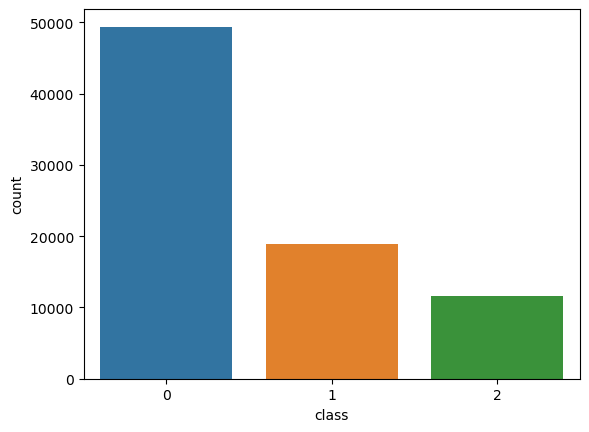

In [17]:
sns.countplot(x=df['class'])

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10014,analyzer=lemmafn)

In [20]:
x=df['text']
y=df['class']

In [21]:
x

0        when life hits and the same time poverty strik...
1             that marble episode of squidgame  ruined me 
2                                           squidgame time
3        blood on st slideim joining the squidgame thin...
4        the two first games players were killed by the...
                               ...                        
80014    yes yes yesarianagrandesquidgame httpstcobqgwd...
80015    squid game was reviewed on revaaa squidgame re...
80016    back amp forth between squid game creator amp ...
80017    so what sort of games do you think theyll play...
80018    venancio_taylor tracklist cala a boca swifter ...
Name: text, Length: 80019, dtype: object

In [22]:
y

0        0
1        0
2        0
3        0
4        2
        ..
80014    0
80015    2
80016    0
80017    0
80018    0
Name: class, Length: 80019, dtype: int64

In [23]:
x=vect.fit_transform(x)

# CNN

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [26]:
model=Sequential()

model.add(Dense(32,activation='relu'))
model.add(Dropout(.4))
model.add(Dense(18,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='relu'))
model.add(Dense(3)) 
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [27]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=25,callbacks=[early_stopping],verbose=1)
# When val.loss starts to increase, it automatically stops

Epoch 1/25
2001/2001 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7027 - loss: 0.7036 - val_accuracy: 0.8738 - val_loss: 0.3376
Epoch 2/25
2001/2001 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8673 - loss: 0.3568 - val_accuracy: 0.8947 - val_loss: 0.2879
Epoch 3/25
2001/2001 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8967 - loss: 0.2874 - val_accuracy: 0.9008 - val_loss: 0.2747
Epoch 4/25
2001/2001 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9110 - loss: 0.2495 - val_accuracy: 0.9015 - val_loss: 0.2742
Epoch 5/25
2001/2001 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9221 - loss: 0.2209 - val_accuracy: 0.9031 - val_loss: 0.2705
Epoch 6/25
2001/2001 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9303 - loss: 0.2038 - val_accuracy: 0.9053 - val_loss: 0.2659
Epoch 7/25
2001/2001 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9344 - loss: 0.1903 - val_accuracy: 0.9045 - val_loss: 0.2795
Epoch 8/25
2001/2001 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9396 - loss: 0.1785 - 

In [28]:
loss,accuracy=model.evaluate(x_test,y_test)

501/501 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.9059 - loss: 0.2862


In [29]:
accuracy

0.9061484336853027

In [30]:
tahmin=model.predict(x_test)

501/501 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


In [31]:
model.save('SquidGame.h5')

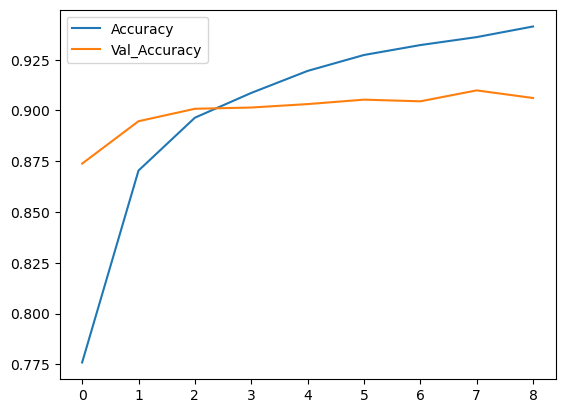

In [32]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

In [33]:
loss_f=pd.DataFrame(history.history)

<Axes: >

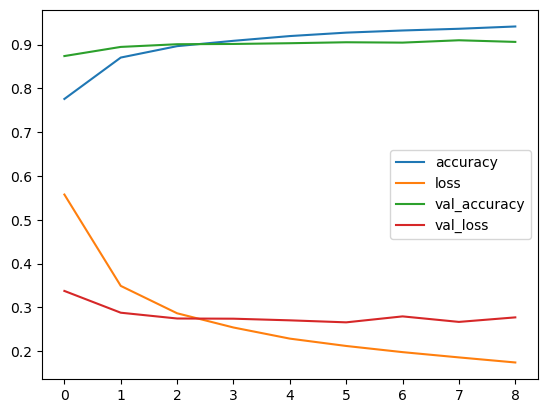

In [34]:
loss_f.plot()

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [36]:
import numpy as np

In [37]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[9136,  430,  328],
       [ 332, 3407,   11],
       [ 386,   15, 1959]])

In [38]:
cm=confusion_matrix(y_test, np.argmax(tahmin, axis=1))

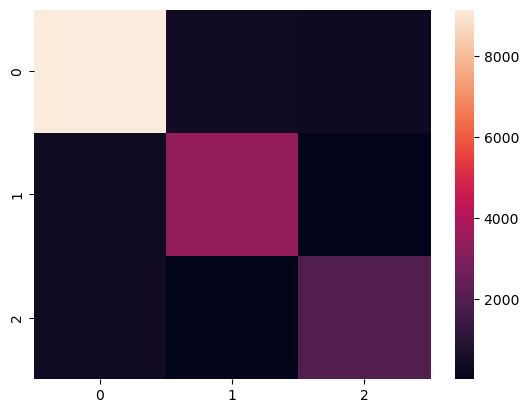

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [40]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      9894
           1       0.88      0.91      0.90      3750
           2       0.85      0.83      0.84      2360

    accuracy                           0.91     16004
   macro avg       0.89      0.89      0.89     16004
weighted avg       0.91      0.91      0.91     16004



## Sentiment analysis and Wordcloud

In [41]:
sawc= df[(df['class'] == 1) | (df['class'] == 2)]

In [42]:
df[df['class'] == 1]   # Positiv tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,Sentiment,class
10,TreasureTress,London,THE Monthly Product Discovery Box for Kinky Cu...,2014-06-20 11:35:56+00:00,1934,406,2159,False,2021-10-06 12:03:56+00:00,the struggle is very real squidgame httpstcoi...,Twitter Web App,False,0.260000,1
13,Mega Visions,NaN,The world's first indie physical SEGA-focused ...,2008-05-28 10:57:13+00:00,16613,484,9036,False,2021-10-06 12:03:03+00:00,thats definitely the first thing i saw whos s...,Buffer,False,0.287500,1
14,Yemzxy,"Lagos, Nigeria",Am special because am a triplet,2021-06-11 16:47:29+00:00,39,160,12,False,2021-10-06 12:02:57+00:00,the saga continues get data cheap honourworld...,Twitter for Android,False,0.400000,1
15,kim joo ryoung pics,fan acc | she/her🦑,one and only. —for actress #김주령♡,2021-10-03 06:38:41+00:00,698,25,226,False,2021-10-06 12:02:52+00:00,naur shes just purely a cutielt squidgame 김주령...,Twitter Web App,False,0.214286,1
22,Pirate_Jail 🎥😎🏴󠁧󠁢󠁳󠁣󠁴󠁿🎩,"#DTLA , Street Runner Films","RN/BSN/CLE :Pediatric/Diabetes Educator, Maste...",2015-10-07 00:51:48+00:00,594,609,466,False,2021-10-06 12:01:47+00:00,i talk to the people i love save your mystery ...,Twitter for iPhone,False,0.220000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79992,SUNDAY ETIM,"Port Harcourt, Nigeria",NaN,2011-08-28 19:18:13+00:00,41,343,97,False,2021-10-28 13:49:29+00:00,cryptotowneu awesome project with rapidly expa...,Twitter for Android,False,1.000000,1
79999,Middy,Cabangbungin,All Abou Fun,2021-04-20 17:03:56+00:00,5,170,210,False,2021-10-28 13:48:31+00:00,cryptotowneu good project sir gogosquidgame sa...,Twitter for Android,False,0.700000,1
80005,Bo sein,NaN,APT,2021-08-26 13:32:03+00:00,90,2214,934,False,2021-10-28 13:47:35+00:00,squidgametoken im very excited to participate ...,Twitter for Android,False,0.698750,1
80011,Chloe.C,NaN,Hey it’s cici. A movielover who also love read...,2021-08-08 11:58:54+00:00,4,13,239,False,2021-10-28 13:46:41+00:00,amazing drama i have watched these days the ci...,Twitter for iPhone,False,0.566667,1


In [43]:
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [44]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [45]:
good=df[df['class']==1]['text']  #positiv

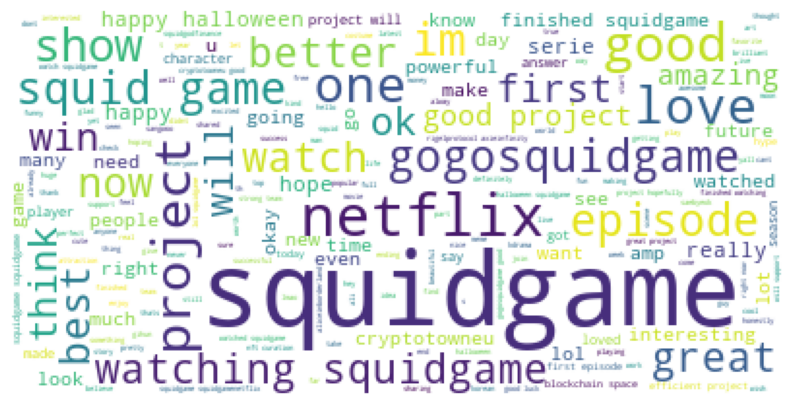

In [46]:
wc(good,'white')

In [47]:
bad=df[df['class']==1]['text'] #negativ

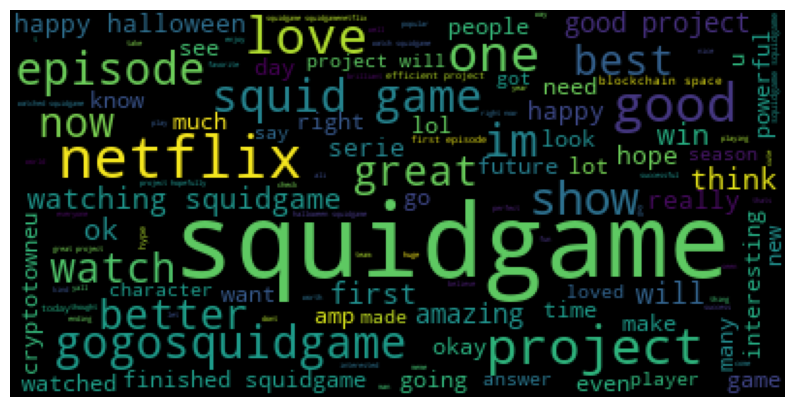

In [48]:
wc(bad,'black')

# accuracy: 0.9059 - loss: 0.2862